In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gsw

# Read in the data from .tab file
#data = pd.read_csv('MOSAIC_snowpit_copy_2.csv', delimiter='\t', header=0, skiprows=1, skipfooter=1, engine='python')
df = pd.read_csv('MOSAIC_snowpit_copy_2.csv')
df_2 = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');



In [35]:
df

,Event,Date,Location,Latitude,Longitude,sample_top,sample_bottom,Comment,absolute_salinity(g/kg),Salinity (psu),Cond(microS/cm),Temperature,sample_id,Unnamed: 13
0,PS122/1_10-5,02/12/2019,snow1-A5,85.924427,113.896223,0.075,0.04,NaN,0.7,NaN,1312.0,15.0,NaN,NaN
1,PS122/1_10-5,02/12/2019,snow1-A5,85.924427,113.896223,0.040,0.02,NaN,13.1,NaN,21750.0,15.0,NaN,NaN
2,PS122/1_10-5,02/12/2019,snow1-A5,85.924427,113.896223,0.020,0.00,NaN,16.5,NaN,26930.0,15.0,NaN,NaN
3,PS122/1_10-50,05/12/2019,RS-transect-north,86.142113,120.967131,0.090,0.07,NaN,0.0,NaN,96.0,15.0,NaN,NaN
4,PS122/1_10-50,05/12/2019,RS-transect-north,86.142113,120.967131,0.070,0.05,NaN,0.1,NaN,161.2,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,PS122/5_63-97,26/09/2020,SNOW5_ICESTATION2,86.029337,35.539477,0.090,0.06,Y,0.1,NaN,NaN,22.5,NaN,NaN
778,PS122/5_63-97,26/09/2020,SNOW5_ICESTATION2,86.029337,35.539477,0.030,0.00,Y,0.0,NaN,NaN,22.9,NaN,NaN
779,PS122/5_63-97,26/09/2020,SNOW5_ICESTATION2,86.029337,35.539477,0.060,0.03,Y,0.1,NaN,NaN,24.1,NaN,NaN
780,PS122/5_63-99,26/09/2020,SNOW5_ICESTATION2,86.032503,35.502449,0.030,0.00,E22,0.0,NaN,NaN,19.0,NaN,NaN


In [37]:
# read latitude longitude and conductivity data
lat = df['Latitude']
lon = df['Longitude']
cond = df['Cond(microS/cm)']
depth = df['sample_top'] # this is in m
Temp = df['Temperature']
# whereever temperature values are NaN or missing replace with 15
Temp[np.isnan(Temp)] = 15
print(cond.shape, Temp.shape)
salinity_weddell = df_2.Sp
snow_depth_weddell = df_2.Snow_depth

(782,) (782,)


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:

# filter out data where conductivity is less than 0 and NaN
lat = lat[cond > 0]
lon = lon[cond > 0]
depth = depth[cond>0]
Temp = Temp[cond > 0]
cond = cond[cond > 0]


# filter out data where conductivity is NaN
lat = lat[~np.isnan(cond)]
lon = lon[~np.isnan(cond)]
depth = depth[~np.isnan(cond)]
Temp = Temp[~np.isnan(cond)]
cond = cond[~np.isnan(cond)]

#convert temp and cond to numpy arrays
Temp = np.array(Temp)
cond = np.array(cond)

# create array the same size as cond
Pres = np.zeros(cond.shape)
Pres[:] = 10.1325


# conductivity microS/cm convert to mS/cm
cond_2 = cond/1000

#salinity = 0.0080 * cond_2 / (1.0 - 0.0017 * cond_2)
salinity = 0.0080 * cond_2 / (1.0 - 0.0017 * cond_2)
salinity = gsw.SP_from_C(cond_2, Temp, Pres)

snow_depth = depth*100 # convert to cm


# Plot comparing the MOSAIC snow pit data with Confer et al 

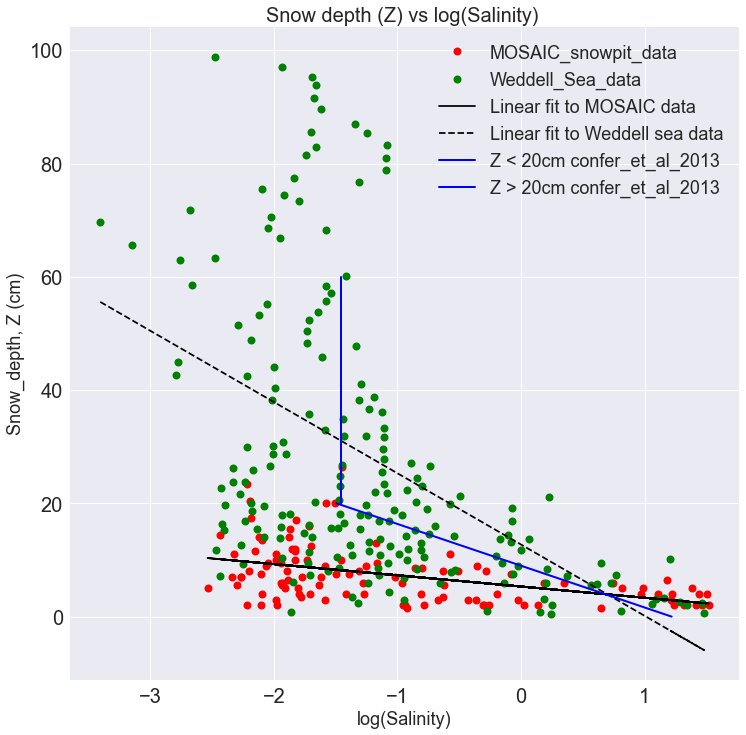

In [39]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

sd_slice1 = snow_depth[snow_depth<20]
sd_slice2 = snow_depth[snow_depth>=20]

sp_slice1 = salinity[snow_depth<20]
sp_slice2 = salinity[snow_depth>20]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16,label = 'MOSAIC_snowpit_data')
plt.plot(np.log10(salinity_weddell),snow_depth_weddell,'g.',markersize = 16, label = 'Weddell_Sea_data')

# linear fit to MOSAIC data
linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
plt.plot(np.log10(salinity),Y_fit,'k-', label = 'Linear fit to MOSAIC data')

# linear fit to Weddell sea data
linear_fit_weddell = np.polyfit(np.log10(salinity_weddell),snow_depth_weddell,1)
Y_fit_weddell = np.polyval(linear_fit_weddell,np.log10(salinity_weddell))
plt.plot(np.log10(salinity_weddell),Y_fit_weddell,'k--', label = 'Linear fit to Weddell sea data')

#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
# inserting parametrisation from confer et al 2013

#sp_confer_1 = 16.47 * np.exp(-0.312*sd_slice1) # z between 0 and 20 cm 
#sp_confer_2 = np.array([0.035]*len(sd_slice2)) # for z >20 cm

snow_depth_1 = np.linspace(0,20,100)
snow_depth_2 = np.linspace(20,60,100)
sp_confer_1 = 16.47 * np.exp(-0.312*snow_depth_1) # z between 0 and 20 cm 
sp_confer_2 = np.array([0.035]*len(snow_depth_2)) # for z >20 cm


plt.plot(np.log10(sp_confer_1), snow_depth_1, 'b-', linewidth = 2, label = 'Z < 20cm confer_et_al_2013')
plt.plot(np.log10(sp_confer_2), snow_depth_2, 'b-', linewidth = 2, label = 'Z > 20cm confer_et_al_2013')
plt.legend(fontsize = 18)



In [40]:
linear_fit

array([-1.98223076,  5.31362867])

In [41]:
linear_fit_weddell

array([-12.59300244,  12.71421742])